<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Выгрузка-данных" data-toc-modified-id="Выгрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Выгрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-типы-данных" data-toc-modified-id="Проверим-типы-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверим типы данных</a></span></li><li><span><a href="#Изучим-пропуски-в-датафрейме" data-toc-modified-id="Изучим-пропуски-в-датафрейме-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучим пропуски в датафрейме</a></span></li><li><span><a href="#Изучим-наличие-дубликатов-в-датафрейме" data-toc-modified-id="Изучим-наличие-дубликатов-в-датафрейме-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изучим наличие дубликатов в датафрейме</a></span></li><li><span><a href="#Изучим-категориальные-значения" data-toc-modified-id="Изучим-категориальные-значения-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изучим категориальные значения</a></span></li><li><span><a href="#Проверим-количественные-значения" data-toc-modified-id="Проверим-количественные-значения-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проверим количественные значения</a></span></li><li><span><a href="#Добавление-новых-данных" data-toc-modified-id="Добавление-новых-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Добавление новых данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследуем-фильмы,-которые-получили-государственную-поддержку" data-toc-modified-id="Исследуем-фильмы,-которые-получили-государственную-поддержку-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследуем фильмы, которые получили государственную поддержку</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование данных о российском кинопрокате



У нас на руках данные Министерства культуры Российской Федерации — информация о руководителях, возрастной категории, рейтинге, бюджете и сборах  фильмов, вышедших на экраны с 2010 по 2019 г. 

Цель проекта — изучить рынок кино, определить интересы зрителей, сборы разных жанров фильмов.


**Ход исследования:**

- предобработать имеющиеся данные;
- изучить объёмы сборов в разбивке по годам / жанрам / возрастным категориям;
- проанализировать суммы выделенных государственных средств на производство картин;
- выполнить анализ окупаемости фильмов каждого из жанров;
- изучить средний рейтинг кинолент каждого из жанров.

**Мое исследование пройдет в шесть этапов:**
 - Обзор данных.
 - Предобработка данных.
 - Расчеты и добавление новых показателей.
 - Исследовательский анализ данных.
 - Изучение фильмов, получивших господдержку.
 - Формирование итогового вывода.

##  Выгрузка данных

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" 

**Для начала импортируем все библиотеки, которые понадобятся и могут нам понадобиться при исследовании.**

In [2]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.options.mode.chained_assignment = None
#приведем числа к удобно читаемому формату и избавимся от будущих ошибок о цепном назначении

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Откроем первую предоставленную таблицу.

In [3]:
data_1 = pd.read_csv('/datasets/mkrf_movies.csv')
#загрузим первый датафрейм

In [4]:
data_1.head()
#выведем первые 5 строк первой таблицы

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
data_1.info()
#посмотрим информацию о первом датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

***
Теперь откроем вторую таблицу.
***

In [6]:
data_2 = pd.read_csv('/datasets/mkrf_shows.csv')
#загрузим второй датафрейм

In [7]:
data_2.head()
#выведем первые 5 строк второй таблицы

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [8]:
data_2.info()
#посмотрим информацию о второй таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


***
Соединять 2 таблицы в одну будем по столбцу **puNumber**, для этого сначала нужно привести тип данных этого столбца к одному в обеих таблицах. В первой таблице у него тип данных *object*, нам нужно привести его к *int*.
***

In [9]:
data_1['puNumber'].sort_values()
#выведем список уникальных значений столбца puNumber

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7486, dtype: object

In [10]:
data_1[~data_1['puNumber'].str.isdigit()]
#выведем строки, которые являются нечисловыми

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_1.loc[804, 'puNumber']
#выведем строку номер 804, чтобы посмотреть, что с ней не так

' 111004112'

***
В строке присутствуют лишние пробелы, удалим их далее с помощью метода *strip*.
***

In [12]:
data_1.loc[804, 'puNumber'] = data_1.loc[804, 'puNumber'].strip()

***
В строке номер 1797 нет номера, вместо него стоит значение "нет". Заменим это значение на заглушку 0, чтобы не удалять строку.
***

In [13]:
data_1.loc[1797, 'puNumber'] = 0

In [14]:
data_1['puNumber'] = data_1['puNumber'].astype('int')
#теперь поменяем тип данных на целочисленный

In [15]:
data_1['puNumber'].dtype
#проверка правильности типа данных

dtype('int64')

***
Теперь можно смело склеивать две таблицы. Склеивать будем по строкам первого датафрейма методом *merge()* с аргументом *how='left'*.
***

In [16]:
data = data_1.merge(data_2, how='left')
#объединим две таблицы по столбцам первого датафрейма

In [17]:
data.head()
#выведем склеенную таблицу

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Теперь убедимся, что размеры изначальных таблиц и финальной совпадают.

In [18]:
data_1.info()
print()
data_2.info()
print()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Количество строк совпадает с изначальными датафреймами (**7486** строк в первом и **3158** во втором), количество столбцов увеличилось на один, что и должно было произойти. Таблицы благополучно склеились, в итоговой объединенной таблице появился новый столбец *box_office*.

##  Предобработка данных

###  Проверим типы данных


***
Для начала снова посмотрим на обновленную таблицу.
***

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

***
В таблице **7486** строк и **16** столбцов. Есть названия столбцов с некорректным регистром, есть пропущенные значения во многих столбцах, а также у многих столбцов стоит неверный тип данных. Нам предстоит разобраться со всем этим безобразием, так давайте приступим!
***
Сначала приведем названия столбцов к змеиному регистру.

In [20]:
data = data.rename(columns = {'puNumber':'pu_number', 'nonrefundable_support':'non_refundable_support'})
#поменяем названия столбцов, приведя к красивому змеиному регистру

Необходимо изменить тип данных в следующих столбцах:
- **show_start_date** - нужно поменять на *datetime*, так как это дата премьеры фильма.
- **ratings** - нужно поменять на *float*, так как это рейтинг и выражается он числами с дробями.

Поменяем типы данных в **show_start_date** и **ratings**.

In [21]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
#изменим тип данных на дату

Так как в столбце **ratings** тип данных *object*, нужно взглянуть на эти строковые значения.

In [22]:
data['ratings'].unique() # выведем уникальные значения столбца ratings

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Скорее всего значения в процентах - это ошибка ввода и значения нужно разделить на 10, чтобы получить корректное значение. Также убрать знак %. Например, 88% - это рейтинг 8.8.

In [23]:
data['ratings'] = data['ratings'].str.strip('%').astype(float)
#уберем знак % из значений столбца, затем переведем к дробному типу данных для дальнейшего преобразования

data['ratings'] = data['ratings'].apply(lambda x: f"{x/10:.1f}" if x>10 else f"{x:.1f}")
#преобразуем все значения с помощью лямбда функции, разделив на 10 все значения больше 10,
#также установив формат для вывода значений с 1 знаком после запятой 


In [24]:
data['ratings'].unique()
#выведем обновленные значения столбца

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', 'nan', '8.2', '7.5', '6.7', '7.9', '5.9', '6.2',
       '5.6', '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5',
       '5.1', '5.7', '5.4', '9.9', '4.4', '4.5', '5.3', '4.1', '8.4',
       '2.6', '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2',
       '4.7', '4.9', '3.9', '2.7', '3.3', '2.9', '2.8', '3.7', '1.4',
       '3.1', '9.7', '3.5', '3.2', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '9.1', '9.4', '9.0', '1.9', '1.0', '8.9', '1.3',
       '1.8', '1.2', '1.7', '9.8'], dtype=object)

Значения корректные, но тип данных нужно снова вернуть к дробному.

In [25]:
data['ratings'] = data['ratings'].astype('float') 
#поменяем тип данных снова к float

In [26]:
data['ratings'].dtype
#проверим тип данных

dtype('float64')

**Вывод**

В ходе данного шага было выполнено следующее:
- переименован столбец **puNumber** и **nonrefundable_support**;
- изменён тип данных в столбцах **show_start_date** и **ratings**;
- данные в столбце **ratings** приведены в единый вид.

###  Изучим пропуски в датафрейме


Для начала выведем количество пропусков в каждом столбце и посмотрим, где их больше всего и меньше всего.

In [27]:
data_na = data.isna().sum()
data_na_perc = round((data.isna().mean() * 100), 2)

display(pd.DataFrame({"Кол-во пропусков": data_na, "% пропусков": data_na_perc}).style.format('{:.2f}').background_gradient('coolwarm'))
print("Всего колонок: {}, без пропусков: {}, с пропусками: {}".format(len(data_na), (data_na == 0).sum(), (data_na != 0).sum() ))

#построим таблицу, в которой будут показано количество пропусков и пропуски в % для каждого столбца нашей таблицы

,Кол-во пропусков,% пропусков
title,0.00,0.00
pu_number,0.00,0.00
show_start_date,0.00,0.00
type,0.00,0.00
film_studio,18.00,0.24
production_country,2.00,0.03
director,9.00,0.12
producer,568.00,7.59
age_restriction,0.00,0.00
refundable_support,7154.00,95.57


Всего колонок: 16, без пропусков: 5, с пропусками: 11


По полученной таблице видим, что только 5 столбцов не имеют пропущенные значения. Больше всего пропусков (целых **95.57%** !) наблюдается в 4 столбцах - все они связаны с **финансовыми показателями** кинокартин. Совпадение? Возможно. Но все это предстоит выяснить нам и никому другому. Второе место по количеству пропусков занимает показатель **сбора в рублях** - **57.81%**. Меньше всего пропусков - в столбце с информацией о **стране-производителе** фильма, всего каких-то **0.03%**.
***
Посмотрим совпадают ли строки с пропусками в четырех самых проблемных столбцах, так как количество пропусков в них совпадает.

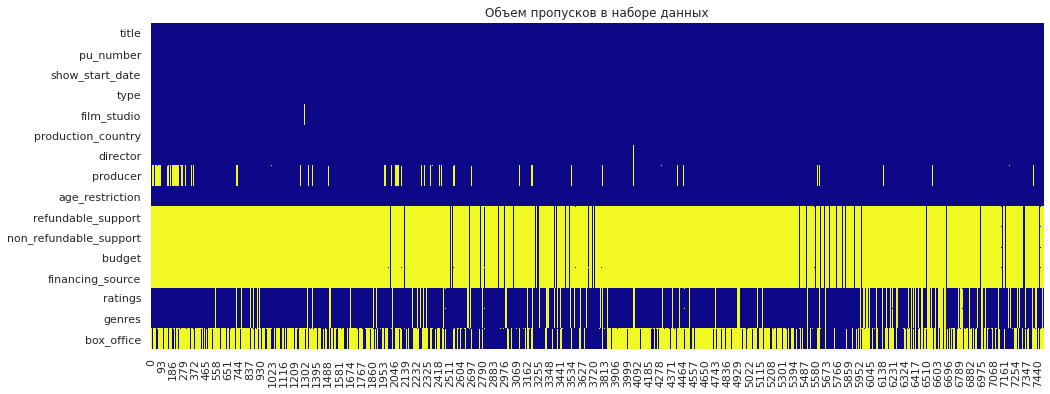

In [28]:
sns.set(rc = {'figure.figsize':(16,6)})
sns.heatmap(data.isna().transpose(), cbar=False, cmap='plasma').set_title('Объем пропусков в наборе данных');


Судя по тепловой карте, пропуски в данных столбцах находятся в одних и тех же строках.

Эта информация уникальная для каждого фильма, поэтому заполнить на основании других данных не получится. Оставим пропуски.
***
Посмотрим подробно те строки, в которых нет не более 20 значений. Пойдём по порядку возрастания количества пропусков.

In [29]:
data[data['production_country'].isnull()] # выведем на экран строки с пустым значением страны-производителя

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Оба произведения сняты в России. Заполним пропуски соответствующим значением.

In [30]:
data['production_country'] = data['production_country'].fillna('Россия') # заполняем пропуски значением Россия

Пропуски в столбцах **film_studio**, **director** и **producer** мы не сможем заполнить, основываясь на данных других столбцов. Придётся заполнить их значением unknown.

In [31]:
for column in ['film_studio', 'director', 'producer']:
    data[column] = data[column].fillna('unknown')

In [32]:
data['ratings'].isna().sum()

967

Заполнить пропуски в данном столбце не предоставляется возможным, так как данный показатель не зависит от других, медианным значением его не заменить.
***
Со столбцом **genres** аналогичная ситуация. Оставляем незаполненным.

Пропуски в **box_office** могут быть связаны либо с отсутствием данных, либо произведения в принципе не подразумевали сбор средств. Оставим незаполненным.

In [33]:
data.isna().sum() # выведем количество пропусков после заполнения части из них

title                        0
pu_number                    0
show_start_date              0
type                         0
film_studio                  0
production_country           0
director                     0
producer                     0
age_restriction              0
refundable_support        7154
non_refundable_support    7154
budget                    7154
financing_source          7154
ratings                    967
genres                     976
box_office                4328
dtype: int64

###  Изучим наличие дубликатов в датафрейме


In [34]:
data.duplicated().sum()

0

Полных дубликатов нет, это отлично. 

Проверим количество уникальных значений в каждом столбце.

In [35]:
data.nunique()

title                     6772
pu_number                 7484
show_start_date           1965
type                         8
film_studio               5491
production_country         950
director                  4812
producer                  5350
age_restriction              5
refundable_support          34
non_refundable_support      75
budget                     290
financing_source             3
ratings                     84
genres                     742
box_office                2938
dtype: int64

Пройдёмся по порядку.

В столбцах **title** и **pu_number** должны быть уникальные значения. Проверим, сколько в них дубликатов.

In [36]:
print('Количество фильмов с одинаковым названием:', 
      len(data.loc[data['title'].duplicated(keep=False)].sort_values(by='title')))

print()

print('Количество фильмов с одинаковым прокатным удостоверением:', 
      len(data.loc[data['pu_number'].duplicated(keep=False)].sort_values(by='title')))

Количество фильмов с одинаковым названием: 1272

Количество фильмов с одинаковым прокатным удостоверением: 4


Дубликаты в названии имеются, скорее всего, из-за того, что в России прокат иностранных фильмов часто производится позже (в мире премьеры по средам, в России по четвергам).

Дубликаты в прокатном удостоверении вещь довольно-таки странная. Их немного, поэтому выведем все на экран.

In [37]:
data.loc[data['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


В строках 4638 и 4639 номер прокатного удостоверения одинаков, вероятнее всего, из-за человеческого фактора.

Строки 5067 и 5068 посвящены одному и тому же фильму, однако во втором случае есть два несоответствия с действительностью (по информации КиноПоиска):
- возрастная категория не «12+», а «16+»;
- рейтинг фильма (на 12.07.2023) 7.4, а не 6.8.

Удалим строку 5068 и исправим имя режиссёра в строке 5067.

In [38]:
data = data.drop(index = 5068) # удаляем строку 5068
data['director'] = data['director'].replace('ХЭрольд Рэмис', 'Харольд Рэмис')

Пройдёмся по остальным столбцам.

**show_start_date**. Учитывая, что премьеры обычно случаются по средам / по четвергам, не удивительно, что в данном поле имеются дубликаты.

**type**. На первый взгляд, проблем нет.

**film_studio**. Каждый фильм не будет сниматься под руководством разных студий. 

**production_country**. В одной стране может быть снято неограниченное количество фильмов.

**director** и **producer**. У режиссёров и продюссеров может быть по несколько фильмов.

**age_restriction**. На первый взгляд, проблем нет.

**refundable_support**, **nonrefundable_support**, **budget**, **box_office**. В данных столбцах содержится информация в виде денежных средств. Совпадения в данных случаях неизбежны.

**financing_source**. Немного источников государственного финансирования.

**ratings**. Так как рейтинг определяется от 0 до 10 с шагом в 0,1, неудивительно, что в данном столбце имеются дубликаты.

**genres**. Так как фильм может иметь несколько жанров, то это нормально, что уникальных значений здесь достаточно много.

**Вывод:**

В ходе данного шага было выполнено следующее:
- описаны возможные причины появления дубликатов в каждом из столбцов;
- удалён дубликат, выявленный по одинаковому номеру прокатного удостоверения;
- заменено имя режиссёра в строке 5067.

### Изучим категориальные значения



Для начала перечислим столбцы с категориальными значениями:

- **type**;
- **film_studio**;
- **production_country**;
- **director**; 
- **producer**;
- **age_restriction**;
- **financing_source**;
- **ratings**;
- **genres**.

Посмотрим на каждый столбец в отдельности.

In [39]:
data['type'].unique() 
#выведем уникальные значения столбца type

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Избавимся от пробелов перед названиями типов фильмов.

In [40]:
data['type'] = data['type'].str.strip()

Предположим, что в остальных столбцах есть такая же проблема. Исправим эту проблему.

In [41]:
for column in ['film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'genres']:
    print(column)
    print('Уникальных значений было:', data[column].nunique())
    data[column] = data[column].str.strip()
    print('Уникальных значений стало:', data[column].nunique())
    print()

film_studio
Уникальных значений было: 5490
Уникальных значений стало: 5462

production_country
Уникальных значений было: 950
Уникальных значений стало: 934

director
Уникальных значений было: 4811
Уникальных значений стало: 4801

producer
Уникальных значений было: 5349
Уникальных значений стало: 5334

age_restriction
Уникальных значений было: 5
Уникальных значений стало: 5

financing_source
Уникальных значений было: 3
Уникальных значений стало: 3

genres
Уникальных значений было: 742
Уникальных значений стало: 742



Как можно заметить, данная проблема была в части столбцов. Столбец **ratings** мы не анализируем, так как в нём содержатся значения с типом данных *float*.
***
В столбце **ratings** имеются фильмы с рейтингом 9,9, хотя на КиноПоиске максимальный рейтинг принаджелит фильму Зелёная миля (9,2).

Выведем строки, у которых рейтинг больше или равен 9.0.

In [42]:
data.loc[data['ratings'] >= 9.0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.90,"ужасы,триллер,драма",NaN
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.70,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,9.90,"триллер,драма,детектив",NaN
1471,Друзья друзей,111014513,2013-12-19 12:00:00+00:00,Художественный,"ООО ""ЕМ Продакшн""",Россия,А.Аксененко,"Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.20,"комедия,мелодрама","27,780.00"
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,9.90,"аниме,мультфильм,ужасы","4,295.00"
2126,Поездка к матери,111002015,2015-03-02 12:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.10,"драма,семейный",0.00
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,9.40,"фантастика,боевик,комедия","334,750.00"
3139,Я умею вязать,111019615,2015-11-27 12:00:00+00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.00,"4,700,000.00","14,462,464.00",Министерство культуры,9.00,драма,"801,370.00"
3514,Чужой дом,111015516,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Лига Продакшн""","Россия, Грузия, Хорватия, Испания",Р.Глурджидзе,"З.Магалашвили, К.Гечмен-Вальдек, Н.Горшкова",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,9.10,драма,NaN
3585,"Машины Страшилки. Серия ""Жутчайшая повесть о п...",114003916,2016-12-09 12:00:00+00:00,Анимационный,"ООО Студия ""АНИМАККОРД"", АНИМАККОРД ЛТД.","Россия, Республика Кипр",Д.Червяцов,"Д.Ловейко, О.Кузовков",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,9.70,"мультфильм,ужасы,фэнтези",NaN


Ни один из этих фильмов не имеет такого высокого рейтинга. Удалим эти строки.

In [43]:
data = data.loc[data['ratings'] < 9.0]

**Вывод**:

В ходе данного шага были удалены лишние символы в значениях категориальных столбцах.

### Проверим количественные значения



Посмотрим на сводную статистику.

In [44]:
data.describe()

,pu_number,refundable_support,non_refundable_support,budget,ratings,box_office
count,"6,498.00",314.00,314.00,314.00,"6,498.00","2,907.00"
mean,"137,197,362.40","12,321,656.05","49,770,760.66","131,346,630.64",6.48,"79,995,600.40"
std,"39,852,213.74","25,461,109.01","61,219,998.23","192,920,712.03",1.10,"245,981,306.32"
min,"1,811,096.00",0.00,0.00,0.00,1.00,0.00
25%,"114,003,216.75",0.00,"25,000,000.00","42,895,000.00",5.90,"83,144.00"
50%,"121,016,618.50",0.00,"30,000,000.00","70,590,586.00",6.60,"2,600,698.00"
75%,"124,002,613.75","15,000,000.00","44,125,000.00","150,006,429.75",7.20,"28,454,412.03"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",8.90,"3,073,568,690.79"


Количественные столбцы:

- refundable_support;
- nonrefundable_support;
- budget;
- box_office.

В общий бюджет фильма входит как государственная поддержка, так и коммерческая, т. е. поля в столбце **budget** должны быть как минимум равны суммарному объёму средств государственной поддержки.

Посмотрим, есть ли строки, в которых общий бюджет произведения меньше государственной поддержки.

In [45]:
data[data['budget'] < (data['refundable_support'] + data['non_refundable_support'])]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Итого: 17 строк. 

Как вариант, можно заполнить бюджет в данных строках исходя из медианного значения доли государственной поддержки произведения.

Посчитаем эту долю, разделим на неё бюджет гос. поддержки и заполним этими данными нулевые значения общего бюджета.

In [46]:
state_budget = ((data['refundable_support'] + data['non_refundable_support']) / data['budget']).median()
#зададим переменную для рассчёта меданной доли государственноо бюджета от общего бюджета

wrong_budget = data[data['budget'] < (data['refundable_support'] + data['non_refundable_support'])]
#зададим переменную для строк с некорректным общим бюджетом
 
data.loc[wrong_budget.index, 'budget'] = (data.loc[wrong_budget.index, 'refundable_support'] + 
                                         data.loc[wrong_budget.index, 'non_refundable_support']) / state_budget
#заполним нулевой бюджет

Изучим аномальные значения. Для начала выведем повторно сводную статистику.

In [47]:
data.describe()

,pu_number,refundable_support,non_refundable_support,budget,ratings,box_office
count,"6,498.00",314.00,314.00,314.00,"6,498.00","2,907.00"
mean,"137,197,362.40","12,321,656.05","49,770,760.66","137,957,806.54",6.48,"79,995,600.40"
std,"39,852,213.74","25,461,109.01","61,219,998.23","191,962,533.48",1.10,"245,981,306.32"
min,"1,811,096.00",0.00,0.00,"9,940,507.10",1.00,0.00
25%,"114,003,216.75",0.00,"25,000,000.00","46,389,327.75",5.90,"83,144.00"
50%,"121,016,618.50",0.00,"30,000,000.00","77,200,875.50",6.60,"2,600,698.00"
75%,"124,002,613.75","15,000,000.00","44,125,000.00","154,803,696.75",7.20,"28,454,412.03"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",8.90,"3,073,568,690.79"


В столбце **box_office** есть значения с 0. Изучим их.

In [48]:
data.loc[data['box_office'] == 0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,"драма,биография,музыка",0.00
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,драма,0.00
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,комедия,0.00
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.50,"драма,военный,история",0.00
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"аниме,мультфильм,драма",0.00
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.70,"аниме,мультфильм,фантастика",0.00
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,биография,0.00
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"комедия,мелодрама",0.00
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.80,"мелодрама,комедия,драма",0.00
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.90,драма,0.00


19 строк.

Вне зависимости от того, насколько неудачным вышел фильм, хотя бы один зритель у него должен быть (а то будет слишком грустно). Поэтому пропуски в данных столбцах вещь аномальная.

Для примера посмотрим информацию по одному из этих фильмов на КиноПоиске. Например, Письмо для Момо https://www.kinopoisk.ru/film/635011/. Сборы в мире почти 6,5 млн. долларов.

Так как сборы фильма являются очень важным показателем, мы должны были бы их удалить, однако делать этого не будем, так как эти строки нам пригодятся при дальнейших анализах.
***
Посмотрим на аномалии в других столбцах.

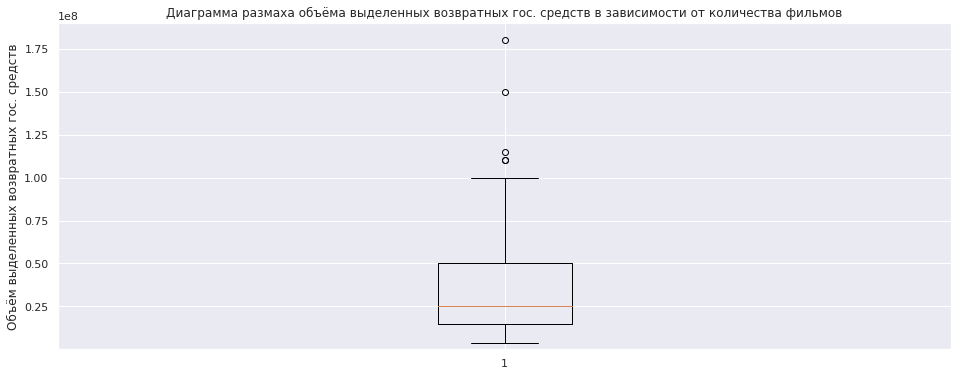

In [49]:
plt.boxplot(data['refundable_support'].loc[data['refundable_support'] > 0])
plt.ylim(1,190000000)
plt.title('Диаграмма размаха объёма выделенных возвратных гос. средств в зависимости от количества фильмов')
plt.ylabel('Объём выделенных возвратных гос. средств');

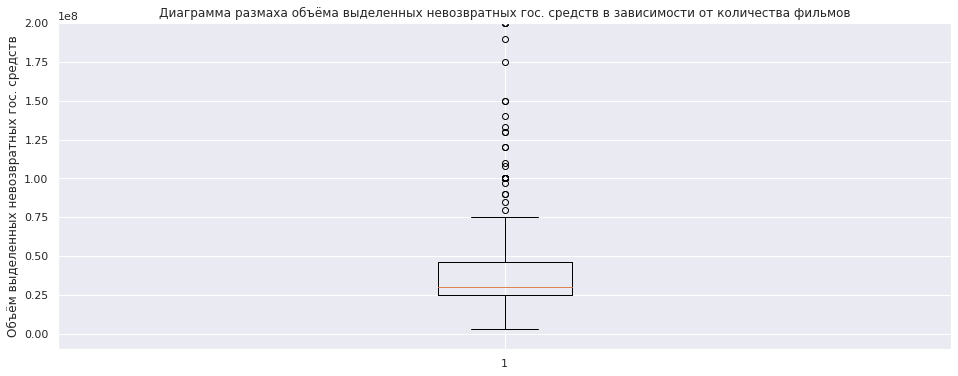

In [50]:
plt.boxplot(data['non_refundable_support'].loc[data['non_refundable_support'] > 0])
plt.ylim(-10000000,200000000)
plt.title('Диаграмма размаха объёма выделенных невозвратных гос. средств в зависимости от количества фильмов')
plt.ylabel('Объём выделенных невозвратных гос. средств');

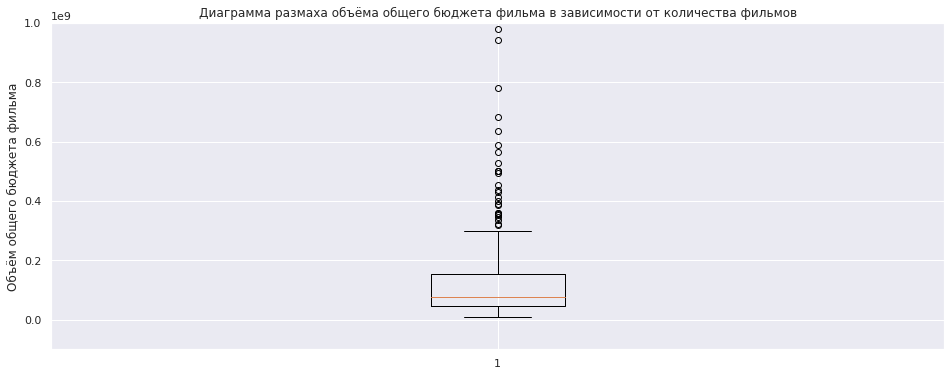

In [51]:
plt.boxplot(data['budget'].loc[data['budget'] > 0])
plt.ylim(-100000000,1000000000)
plt.title('Диаграмма размаха объёма общего бюджета фильма в зависимости от количества фильмов')
plt.ylabel('Объём общего бюджета фильма');

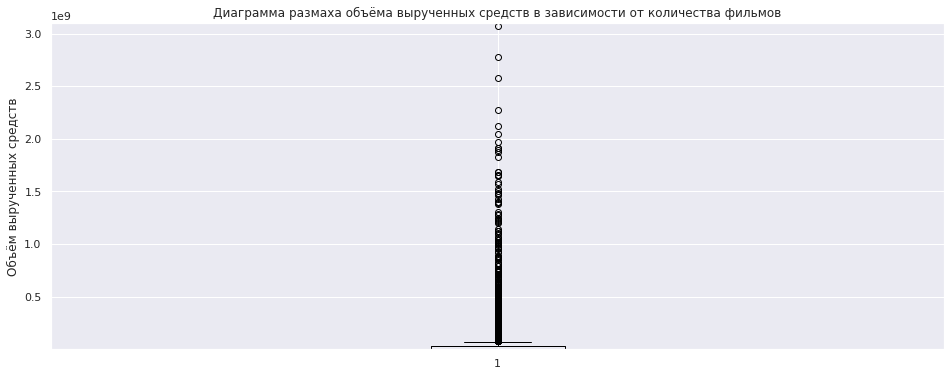

In [52]:
plt.boxplot(data['box_office'].loc[data['box_office'] > 0])
plt.ylim(1,3100000000)
plt.title('Диаграмма размаха объёма вырученных средств в зависимости от количества фильмов')
plt.ylabel('Объём вырученных средств');

По такой диаграмме размаха мало что понятно, нужно построить новую с другими ограничениями по оси Х. Сузим выборку для более репрезентативного графика.

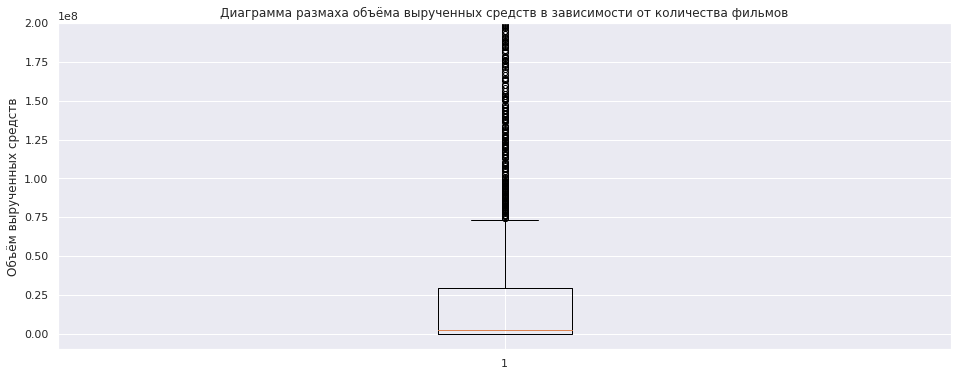

In [53]:
plt.boxplot(data['box_office'].loc[data['box_office'] > 0])
plt.ylim(-10000000,200000000)
plt.title('Диаграмма размаха объёма вырученных средств в зависимости от количества фильмов')
plt.ylabel('Объём вырученных средств');

На основании диаграмм размаха можно сделать следующие промежуточные выводы:
- аномалии в каждом столбце начинаются со значений:
    - объём возвратных средств — 100 млн. руб.;
    - объём невозвратных средств — 75 млн. руб.;
    - общий бюджет фильма — 300 млн. руб..;
    - объём вырученных средств — 75 млн. руб.
- значительное количество фильмов находятся в аномальной зоне — при избавлении от них количество оставшихся значений может негативно повлиять на итоговые результаты.

Строк с данными для анализа у нас и так недостаточно, так ещё и много аномальных значений. Лучше дополнительно не удалять строки.

**Вывод**

В ходе данного шага было выполнено следующее:
- идентифицирована проблема с отсутствием общего бюджета при государственной поддержке;
- заполнены нулевые значения в общем бюджете на основании медианного значения доли государственной поддержки и разнообразной государственной поддержки;
- проанализированы столбцы с аномальными значениями.

###  Добавление новых данных





Создадим столбец с информацией о годе проката.

In [54]:
data['year'] = data['show_start_date'].dt.year 
#добавляем столбец с годом премьеры фильма

Добавим еще два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [55]:
def add_columns(data, columns): 
    for column in columns:
        data[f'major_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
    return data
#создаём функцию для добавления новых столбцов, учитывая название столбца и его содержание

data = add_columns(data, ['director', 'genres']) 
#добавляем столбцы c главным именем режиссёра и главным жанром

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [56]:
print(f'Доля государственной поддержки от общего бюджета фильма составляет {state_budget:.1%}')

Доля государственной поддержки от общего бюджета фильма составляет 60.4%


Добавим столбец с долей государственной поддержкой от общего бюджета фильма.

In [57]:
data['state_budget'] = (data['refundable_support'] + data['non_refundable_support']) / data['budget']

In [58]:
data.head(2)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office,year,major_director,major_genres,state_budget
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN


**Вывод**

В ходе данного шага было выполнено следующее:
- изменён тип данных в требующих того столбцах;
- заполнены пропуски в столбцах;
- проведена работа с неявными дубликатами;
- выявлены аномальные значения, часть из которых удалена;
- добавлены новые столбцы;
- посчитана доля государственной поддержки от общего бюджета фильма.

## Исследовательский анализ данных


Построим сводную таблицу, содержащую информацию о количестве фильмов в каждый из доступных годов.

In [59]:
data.pivot_table(index = 'year', values = 'title', aggfunc = 'count')

,title
year,
2010,910
2011,576
2012,546
2013,581
2014,739
2015,619
2016,714
2017,436
2018,654


Теперь посмотрим, сколько фильмов имеется с заполненным количеством сборов. Сделаем переменную, так как в дальнейшем эти данные пригодятся. Включим туда среднее, медианной значение, количество и сумму.

Поле **box_office** имеет крупные значения. Создадим дополнительный столбец, в котором будут содержаться те же данные, но в миллионах.

In [60]:
data['box_office_mln'] = data['box_office'] / 1000000 
#создаём дополнительный столбец

data_pivot_year = data.loc[data['box_office_mln'].notna(), 
                      ['year', 'box_office_mln']].groupby('year').agg(['mean', 'median', 'count', 'sum'])

data_pivot_year.columns = data_pivot_year.columns.get_level_values(1)
#укажем наименования столбцов 

data_pivot_year

,mean,median,count,sum
year,,,,
2010,0.02,0.00,102,2.42
2011,0.02,0.00,104,2.06
2012,0.06,0.01,123,6.86
2013,0.17,0.00,179,29.65
2014,27.93,0.02,262,"7,317.08"
2015,91.47,7.20,417,"38,142.97"
2016,98.09,5.09,467,"45,808.33"
2017,138.50,10.60,333,"46,120.56"
2018,105.69,10.48,443,"46,820.29"


Как можно заметить, количество фильмов значительно сократилось. Посчитаем, какая доля фильмов имеет информацию о сборах.

In [61]:
print(f'Доля фильмов с информацией о сборах составляет {data.box_office.notna().mean():.1%}')

Доля фильмов с информацией о сборах составляет 44.7%


Изучим динамику проката по годам. Найдем минимальную и максимульную сумму сборов.

На основании ранее созданной таблицы построим график с динамикой сборов по годам для наглядности.

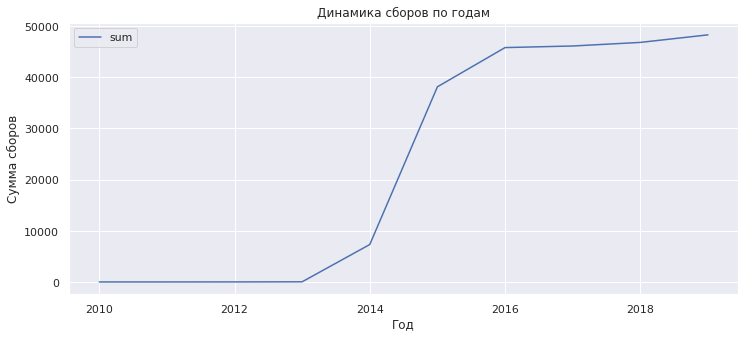

In [62]:
data_pivot_year.plot(
    title = 'Динамика сборов по годам',
    xlabel = 'Год',
    ylabel = 'Сумма сборов', 
    kind='line',
    y = 'sum',
    grid=True,
    figsize=(12, 5),
)
plt.show()
#построим график для наглядности

На графике видно, что с каждым годом размер сборов увеличивался. Максимальный объём мы видим, в 2019, а вот минимальный скрыт из-за размеров графика, расположен где-то в промежутке между 2010-2013 годами. Найдём его.

In [63]:
data_pivot_year['sum'].idxmin()

2011

Минимальный объём сборов был в 2011 году.

Чуть ренее создали сводную таблицу, в которой была вся нужная информация. Отобразим среднюю и медианную сумму сборов для каждого года в виде графика.

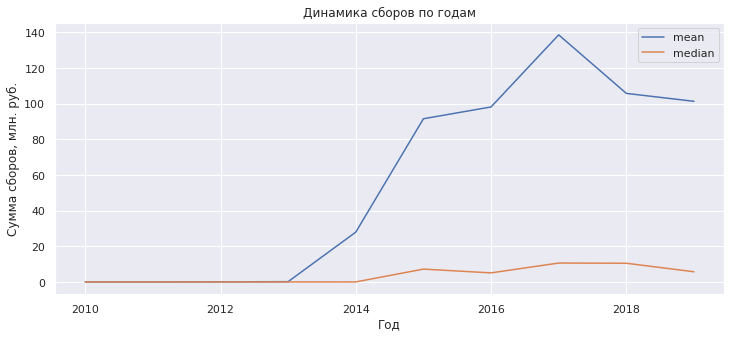

In [64]:
data_pivot_year.plot(
    title = 'Динамика сборов по годам',
    xlabel = 'Год',
    ylabel = 'Сумма сборов, млн. руб.', 
    kind='line',
    y = ['mean', 'median'],
    grid=True, figsize=(12, 5),
);
#построим график для наглядности

По графику видно, что среднее значение сборов и медианное кардинально отличаются. Это связано с тем, что есть картины, которые заработали достаточно много в отличие от большинства фильмов.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

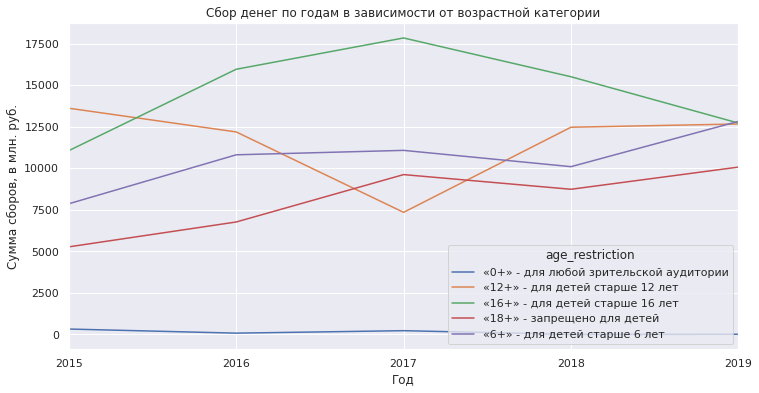

In [65]:
data_pivot_age = data[data['box_office_mln'].notna()].pivot_table(index = 'year',
                                                 columns = 'age_restriction', 
                                                 values = 'box_office_mln', aggfunc = 'sum')
#сделаем сводную таблицу

age_plot = data_pivot_age.plot(
    title = 'Сбор денег по годам в зависимости от возрастной категории', 
    kind = 'line',
    xlabel = 'Год', 
    ylabel = 'Сумма сборов, в млн. руб.',
    xlim = [2015, 2019],
    grid=True,
    figsize=(12, 6),
);
#построим график для наглядности

age_plot.set_xticks([2015, 2016, 2017, 2018, 2019]);
#зададим значения годов для оси Х, чтобы не отображались дробные значения


In [66]:
data[data['box_office_mln'].notna()].pivot_table(index = 'year', 
                                                 columns = 'age_restriction', 
                                                 values = 'box_office_mln', aggfunc = 'count')
#создадим сводную таблицу с количеством фильмов

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2010,22.00,17.00,56.00,7.00,NaN
2011,25.00,22.00,54.00,2.00,1.00
2012,26.00,16.00,48.00,17.00,16.00
2013,35.00,59.00,43.00,16.00,26.00
2014,33.00,81.00,79.00,42.00,27.00
2015,22.00,65.00,158.00,123.00,49.00
2016,18.00,72.00,171.00,145.00,61.00
2017,2.00,34.00,116.00,142.00,39.00
2018,2.00,56.00,147.00,175.00,63.00


Возрастное ограничение влияет на сборы — относительно других фильмы с рейтингом «0+» собирают меньше всего, в то время как в период с 2016 по 2018 фильмы «16+» были в топе по сборам. 

В 2017 году у фильмов «16+» наблюдается пик — в этом году вышли такие блокбастеры, как «Человек-паук: Возвращение домой» и «Стражи галактики 2», которые отметились отличными сборами.

Фильмы «0+» собирают меньше всего за счёт того, что под данным рейтингом выпускается меньше всего картин, которые, скорее всего, не пользуются особым спросом у потребителей.

Наиболее стабильно хорошо собирают киноленты «6+», что связано, скорее всего, с тем, что под эту категорию попадают мультфильмы известных кинокомпаний (например, The Walt Disney Company, Pixar), которые регулярно пользуются спросом.

Напрямую на сумму сборов влияет, помимо количества фильмов, качество фильмов — например, в 2018 больше всего фильмов было снято в категории «18+», при этом по сборам они всего лишь на предпоследнем месте.
***
**Вывод**

В ходе данного шага было выполнено следующее:

- было выявлено, что от года к году сумма сборов растёт, что может быть связано с ежегодным поднятием цен на билеты;
- определено, что больше всего собирают киноленты с возрастным ограничением «16+», меньше всего — «0+», что связано с количеством и качеством картин.

### Исследуем фильмы, которые получили государственную поддержку



Исследование фильмов, получивших господдержку, будет состоять в следующем:
- посмотрим, фильмы каких жанры и в каком объёме в принципе получили государственную поддержку;
- изучим окупаемость фильмов с разными жанрами;
- проанализируем средний рейтинг фильмов каждого из жанров.
***
Добавим столбец с общим объёмом выделяемых средств на поддержку кино.

In [67]:
data['total_support'] = data['refundable_support'] + data['non_refundable_support']

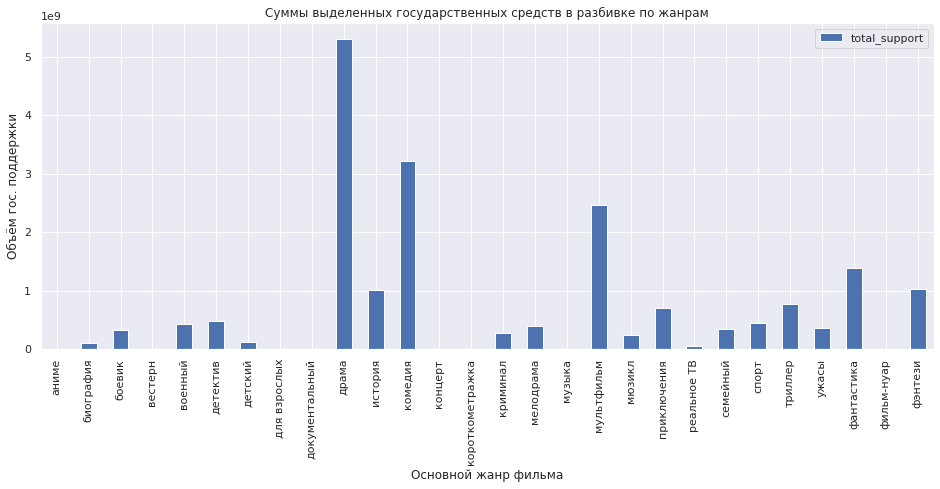

In [68]:
data.pivot_table(index = 'major_genres', 
                 values = 'total_support', 
                 aggfunc = 'sum').plot(
    title = 'Суммы выделенных государственных средств в разбивке по жанрам', 
    xlabel = 'Основной жанр фильма',
    ylabel = 'Объём гос. поддержки',
    kind = 'bar',
);
#построим столбчатую диаграмму для наглядности

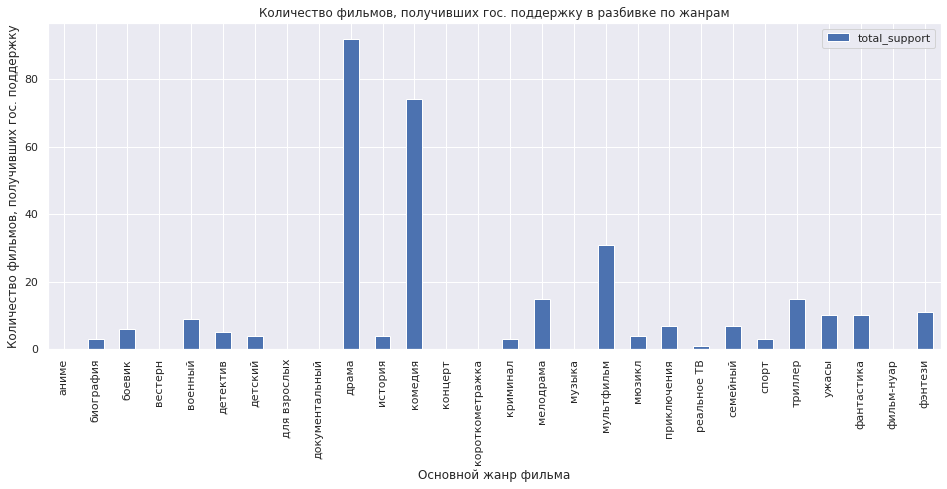

In [69]:
data.pivot_table(index = 'major_genres', 
                 values = 'total_support', 
                 aggfunc = 'count').plot(
    title = 'Количество фильмов, получивших гос. поддержку в разбивке по жанрам', 
    xlabel = 'Основной жанр фильма', 
    ylabel = 'Количество фильмов, получивших гос. поддержку',
    kind = 'bar',
);
#построим столбчатую диаграмму для наглядности

На драму выделяют больше всего средств. На часть фильмов финансирование попросту не выделяется.
***
Проверим, насколько окупаются картины каждого из жанров. Для этого нам необходимо создать отдельную таблицу, в которую включим только те строки, в которых присутствует информация о сумме государственной поддержки.

In [70]:
data_support = data[data['refundable_support'].notna() | data['non_refundable_support'].notna()] 
#cоздаем таблицу

data_support['profit'] = data_support['box_office'] - data_support['total_support'] 
#добавим столбец с прибылью

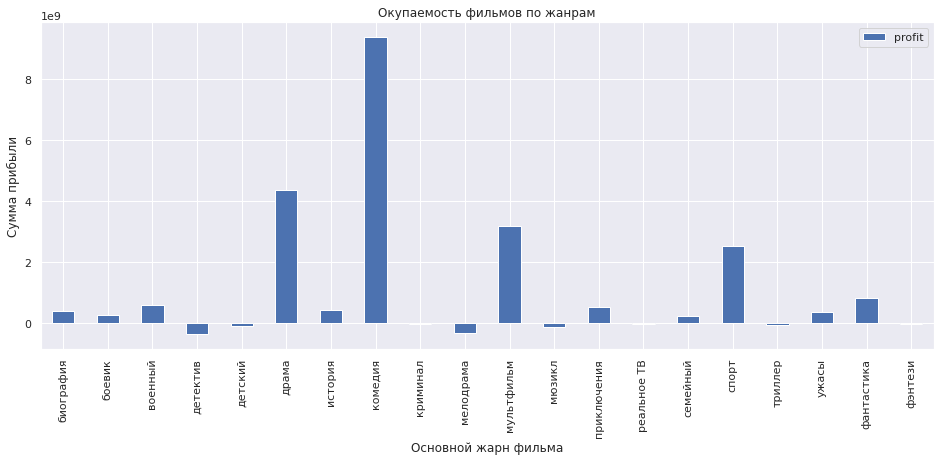

In [71]:
data_support.pivot_table(index = 'major_genres', 
                 values = 'profit', 
                 aggfunc = 'sum').plot(
    title = 'Окупаемость фильмов по жанрам',
    xlabel = 'Основной жарн фильма', 
    ylabel = 'Сумма прибыли',
    kind = 'bar',
);
#построим столбчатую диаграмму для наглядности

Несмотря на то, что на драму выделяется больше всего государственных стредств, больше всего прибыли приносят фильмы в жанре комедии. Часть фильмов снимается в убыток. В большем минусе относительно остальных жанров — детектив и мелодрама.
***
Изучим средний рейтинг фильмов по жанрам. Построим гистограмму.

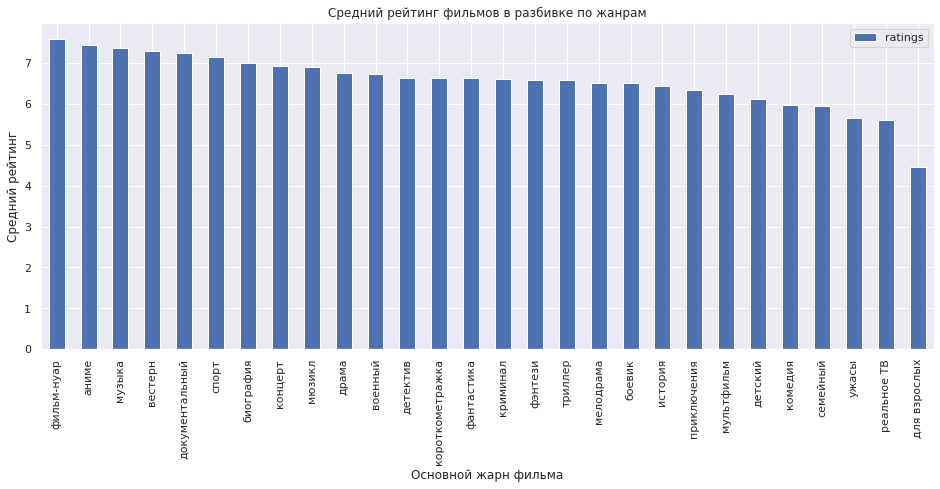

In [72]:
data[['ratings', 'major_genres']].groupby('major_genres').agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(
    title='Средний рейтинг фильмов в разбивке по жанрам', 
    xlabel = 'Основной жарн фильма', 
    ylabel = 'Средний рейтинг',
    kind='bar',
);
#построим столбчатую диаграмму для наглядности

Зрителям больше всего нравятся фильмы в жанре нуар, меньше всего — для взрослых.
***
На основе полученных данных можно сделать следующие выводы:
- наибольший объём государственных средств выделяется на съёмку фильмов в жанре драма, при этом лучше всего окупаются фильмы в жанре комедии. Хуже всего окупаются фильмы в жанре детектив и мелодрама;
- наибольший средний рейтинг у фильмов в жанре нуар, наименьший — для взрослых.

## Общий вывод

**В ходе исследования было выполнено:**
- два датафрейма объединены в один;
- скорректированы тип данных и название столбцов;
- заполнены пропуски (где возможно);
- удалены неявные дубликаты;
- проанализированы аномальные значения, часть из которых была удалена;
- добавлены столбцы для проведения анализа.

**По итогам было выявлено следующее:**
- минимальный объём сборов был в 2011 году, максимальный — в 2019.
- в большей части фильмов отсутствует информация о размере государственной поддержки;
- доля фильмов с информацией о сборах составляет 44,7%;
- динамика сборов увеличивается с каждым годом, что может быть связано с ростом цен на билеты;
- больше всего собирают фильмы в категории «16+», меньге всего — в категории «0+», что, скорее всего, связано с размером целевой аудитории и качеством продукта;
- больше всего государство выделяет средств на съёмку драм;
- лучше всего окупаются фильмы в жанре комедия, хуже — мелодрама и детектив;
- наибольший средний рейтинг у фильмов в жанре нуар, наименьший — для взрослых.